In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [186]:
from google.colab import files
uploaded=files.upload()

Saving dataset_for_college_fest.csv to dataset_for_college_fest (1).csv


In [187]:
df=pd.read_csv('dataset_for_college_fest.csv')

In [188]:
df.head()

,Feedback
0,Average experience tha.
1,"Event late start hua, bohot boring lag raha tha."
2,Hackathon kaafi productive aur engaging tha.
3,Hackathon experience was unforgettable.
4,Hackathon mein resources kam the.


In [189]:
print(df.shape)

(300, 1)


In [190]:
example=df['Feedback'][50]
print(example)

Cultural programs were top notch.


In [191]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [192]:
nltk.word_tokenize(example)

['Cultural', 'programs', 'were', 'top', 'notch', '.']

In [193]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [194]:
tokens=nltk.word_tokenize(example)
tokens

['Cultural', 'programs', 'were', 'top', 'notch', '.']

In [195]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [196]:
tagged=nltk.pos_tag(tokens)
tagged

[('Cultural', 'JJ'),
 ('programs', 'NNS'),
 ('were', 'VBD'),
 ('top', 'JJ'),
 ('notch', 'NN'),
 ('.', '.')]

In [197]:
import nltk
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

In [198]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [199]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S Cultural/JJ programs/NNS were/VBD top/JJ notch/NN ./.)


In [200]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import pipeline
from scipy.special import softmax

In [201]:
classifier = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-xlm-roberta-base-sentiment"
)

Device set to use cpu


In [202]:
print(example)

Cultural programs were top notch.


In [203]:
#Run for Huggingface model

In [204]:
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment")

classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Device set to use cpu


In [205]:
def polarity_scores_roberta(example):
  encoded_text=tokenizer(example, return_tensors='pt')
  output=model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={
      'Negative':scores[0],
      'Neutral':scores[1],
      'Positive':scores[2]
}
  return scores_dict

In [206]:
from tqdm.notebook import tqdm

# Task
Analyze the sentiment of feedback data from a new dataset and calculate calibrated confidence scores using temperature scaling, then present the results in a table.

## Load new data

### Subtask:
Load the newly uploaded CSV file into a pandas DataFrame.


**Reasoning**:
Load the new CSV file into a pandas DataFrame and display the first few rows.



In [207]:
new_df = pd.read_csv('dataset_for_college_fest.csv')
display(new_df.head())

,Feedback
0,Average experience tha.
1,"Event late start hua, bohot boring lag raha tha."
2,Hackathon kaafi productive aur engaging tha.
3,Hackathon experience was unforgettable.
4,Hackathon mein resources kam the.


## Perform sentiment analysis

### Subtask:
Apply the existing sentiment analysis model to the new feedback data to get the initial sentiment scores.


**Reasoning**:
Apply the sentiment analysis function to each feedback entry in the new dataframe and store the results.



In [208]:
new_results = []
for i, row in tqdm(new_df.iterrows(), total=len(new_df)):
    try:
        feedback = row['Feedback']
        roberta_result = polarity_scores_roberta(feedback)
        new_results.append(roberta_result)
    except Exception as e:
        print(f'Error processing row {i}: {e}')

  0%|          | 0/300 [00:00<?, ?it/s]

In [209]:
roberta_result

{'Negative': np.float32(0.82834494),
 'Neutral': np.float32(0.116947465),
 'Positive': np.float32(0.05470756)}

## Combine data and scores

### Subtask:
Combine the original feedback text from the new dataset with the sentiment scores obtained from the sentiment analysis model into a single DataFrame.


**Reasoning**:
Combine the original feedback text and the sentiment scores from the new data into a single DataFrame as instructed.



In [210]:
new_results_df = pd.DataFrame(new_results)
new_combined_df = pd.concat([new_df, new_results_df], axis=1)
display(new_combined_df.head())

,Feedback,Negative,Neutral,Positive
0,Average experience tha.,0.286790,0.474208,0.239002
1,"Event late start hua, bohot boring lag raha tha.",0.617145,0.233789,0.149066
2,Hackathon kaafi productive aur engaging tha.,0.126171,0.180915,0.692914
3,Hackathon experience was unforgettable.,0.029545,0.082277,0.888178
4,Hackathon mein resources kam the.,0.289080,0.413870,0.297049


In [211]:
new_combined_df['Sentiment'] = new_combined_df[['Negative', 'Neutral', 'Positive']].idxmax(axis=1)
display(new_combined_df.head())

,Feedback,Negative,Neutral,Positive,Sentiment
0,Average experience tha.,0.286790,0.474208,0.239002,Neutral
1,"Event late start hua, bohot boring lag raha tha.",0.617145,0.233789,0.149066,Negative
2,Hackathon kaafi productive aur engaging tha.,0.126171,0.180915,0.692914,Positive
3,Hackathon experience was unforgettable.,0.029545,0.082277,0.888178,Positive
4,Hackathon mein resources kam the.,0.289080,0.413870,0.297049,Neutral


## Temperature scaling (recalibration)

### Subtask:
Re-train the temperature scaling model using the logits from the new data on the validation set, and apply the learned temperature to get calibrated confidence scores.


**Reasoning**:
Extract the raw logits for the validation dataset, define the cross-entropy loss function, and define the optimization function for temperature scaling. Then, apply the learned temperature to the new data to get calibrated confidence scores and add them to the DataFrame.



In [212]:
from sklearn.model_selection import train_test_split

# Split the new combined dataframe into training and validation sets
new_train_df, new_val_df = train_test_split(new_combined_df, test_size=0.2, random_state=42)

print("New training set shape:", new_train_df.shape)
print("New validation set shape:", new_val_df.shape)

New training set shape: (240, 5)
New validation set shape: (60, 5)


In [213]:
new_results_df = pd.DataFrame(new_results)
new_combined_df = pd.concat([new_df, new_results_df], axis=1)
display(new_combined_df.head())

,Feedback,Negative,Neutral,Positive
0,Average experience tha.,0.286790,0.474208,0.239002
1,"Event late start hua, bohot boring lag raha tha.",0.617145,0.233789,0.149066
2,Hackathon kaafi productive aur engaging tha.,0.126171,0.180915,0.692914
3,Hackathon experience was unforgettable.,0.029545,0.082277,0.888178
4,Hackathon mein resources kam the.,0.289080,0.413870,0.297049


In [214]:
from sklearn.model_selection import train_test_split
import torch
import numpy as np
import torch.nn as nn

# Add the 'Sentiment' column to new_combined_df before splitting
new_combined_df['Sentiment'] = new_combined_df[['Negative', 'Neutral', 'Positive']].idxmax(axis=1)

# Split the new combined dataframe into training and validation sets
new_train_df, new_val_df = train_test_split(new_combined_df, test_size=0.2, random_state=42)

print("New training set shape:", new_train_df.shape)
print("New validation set shape:", new_val_df.shape)

New training set shape: (240, 5)
New validation set shape: (60, 5)


In [215]:
# Get logits for the new validation set
new_val_logits = []
for feedback in new_val_df['Feedback']:
    encoded_text = tokenizer(feedback, return_tensors='pt')
    with torch.no_grad():  # Disable gradient calculation for inference
        output = model(**encoded_text)
    new_val_logits.append(output.logits.squeeze().numpy())

new_val_logits = np.array(new_val_logits)
print("New validation logits shape:", new_val_logits.shape)

New validation logits shape: (60, 3)


In [216]:
class TemperatureScaling(nn.Module):
    def __init__(self):
        super().__init__()
        self.temperature = nn.Parameter(torch.ones(1))

    def forward(self, logits):
        return logits / self.temperature

In [217]:
# Convert new validation logits and labels to torch tensors
new_val_logits_tensor = torch.from_numpy(new_val_logits)
# Assuming the true labels are in a 'Sentiment' column in new_val_df and encoded as 0, 1, 2
sentiment_to_label = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
new_val_labels_tensor = torch.tensor([sentiment_to_label[s] for s in new_val_df['Sentiment'].values])

# Initialize a new temperature scaling model
new_temp_scale_model = TemperatureScaling()

# Define the optimizer and criterion
optimizer = torch.optim.LBFGS([new_temp_scale_model.temperature], lr=0.01, max_iter=50)
criterion = nn.CrossEntropyLoss()

# Optimize the temperature
def eval():
    loss = criterion(new_temp_scale_model(new_val_logits_tensor), new_val_labels_tensor)
    loss.backward()
    return loss

optimizer.step(eval)

learned_temperature = new_temp_scale_model.temperature.item()
print("Learned Temperature (New Data):", learned_temperature)

Learned Temperature (New Data): -111.1269302368164


In [218]:
import torch

# Get logits for the entire new dataset
new_logits = []
for feedback in new_combined_df['Feedback']:
    encoded_text = tokenizer(feedback, return_tensors='pt')
    with torch.no_grad():  # Disable gradient calculation for inference
        output = model(**encoded_text)
    new_logits.append(output.logits.squeeze().numpy())

new_logits = np.array(new_logits)
print("New dataset logits shape:", new_logits.shape)

# Apply the learned temperature to the new dataset logits
new_logits_tensor = torch.from_numpy(new_logits)
calibrated_logits_new = new_temp_scale_model(new_logits_tensor)

# Calculate calibrated probabilities using softmax
calibrated_probabilities_new = torch.softmax(calibrated_logits_new, dim=1).detach().numpy()

# Add calibrated probabilities to the new combined dataframe
new_calibrated_df = new_combined_df.copy()
new_calibrated_df[['Calibrated_Negative', 'Calibrated_Neutral', 'Calibrated_Positive']] = calibrated_probabilities_new

# Calculate calibrated confidence (max probability)
new_calibrated_df['Confidence Score'] = new_calibrated_df[['Calibrated_Negative', 'Calibrated_Neutral', 'Calibrated_Positive']].max(axis=1)

display(new_calibrated_df.head())

New dataset logits shape: (300, 3)


,Feedback,Negative,Neutral,Positive,Sentiment,Calibrated_Negative,Calibrated_Neutral,Calibrated_Positive,Confidence Score
0,Average experience tha.,0.286790,0.474208,0.239002,Neutral,0.333653,0.332146,0.334201,0.334201
1,"Event late start hua, bohot boring lag raha tha.",0.617145,0.233789,0.149066,Negative,0.330946,0.333850,0.335204,0.335204
2,Hackathon kaafi productive aur engaging tha.,0.126171,0.180915,0.692914,Positive,0.335396,0.334310,0.330294,0.335396
3,Hackathon experience was unforgettable.,0.029545,0.082277,0.888178,Positive,0.337762,0.334663,0.327575,0.337762
4,Hackathon mein resources kam the.,0.289080,0.413870,0.297049,Neutral,0.333719,0.332643,0.333638,0.333719


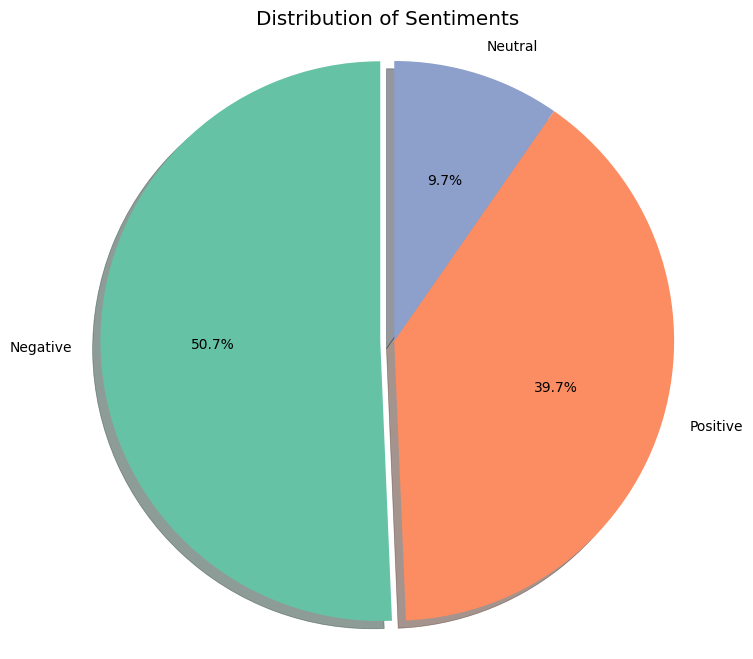

In [219]:
# Count the occurrences of each sentiment
sentiment_counts = new_combined_df['Sentiment'].value_counts()

# Create a pie chart with a 3D effect
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66c2a5', '#fc8d62', '#8da0cb'],
        shadow=True, # Add shadow for 3D effect
        explode=(0.05, 0, 0) # Explode a slice for emphasis (optional)
       )
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [220]:
# Create a new DataFrame with the desired columns from the new calibrated data
output_df_new = new_calibrated_df[['Feedback', 'Sentiment', 'Confidence Score']].copy()

# Format the calibrated confidence as a percentage
output_df_new['Confidence Score'] = output_df_new['Confidence Score'].apply(lambda x: f'{x:.2%}')

# Display the table
display(output_df_new)

,Feedback,Sentiment,Confidence Score
0,Average experience tha.,Neutral,33.42%
1,"Event late start hua, bohot boring lag raha tha.",Negative,33.52%
2,Hackathon kaafi productive aur engaging tha.,Positive,33.54%
3,Hackathon experience was unforgettable.,Positive,33.78%
4,Hackathon mein resources kam the.,Neutral,33.37%
...,...,...,...
295,Campus looked so vibrant during the fest.,Positive,33.80%
296,"Hackathon was decent, not too good, not too bad.",Positive,33.52%
297,"Thoda mixed feeling hai, accha bhi tha aur bor...",Negative,33.50%
298,"The fest was really well organized, had so muc...",Positive,33.88%


In [233]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords if not already downloaded
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Get English stopwords
english_stopwords = stopwords.words('english')

# Manually add common Hindi words that are not sentiment-bearing
manual_hindi_stopwords = [
    'tha', 'aur', 'hua', 'thi', 'par', 'kuch', 'nahi', 'ki', 'ka', 'ke', 'mein', 'yeh', 'woh', 'hai', 'ho', 'bhi', 'liye', 'jaise', 'tab', 'tak', 'fir','aa','gaya'
]

all_stopwords = set(english_stopwords + manual_hindi_stopwords)

# Separate feedback based on sentiment
positive_feedback = new_combined_df[new_combined_df['Sentiment'] == 'Positive']['Feedback']
negative_feedback = new_combined_df[new_combined_df['Sentiment'] == 'Negative']['Feedback']

# Function to get most common words
def get_most_common_words(feedback_series, num_words=10):
    all_words = []
    for feedback in feedback_series:
        # Tokenize words and convert to lowercase
        words = nltk.word_tokenize(feedback.lower())
        # Remove punctuation and stopwords
        words = [word for word in words if word not in string.punctuation and word not in all_stopwords]
        all_words.extend(words)

    # Get word frequency
    word_counts = Counter(all_words)
    return word_counts.most_common(num_words)

# Get and display most common positive words
print("Most Common Positive Words:")
most_common_positive = get_most_common_words(positive_feedback)
for word, frequency in most_common_positive:
    print(f"{word}: {frequency}")

print("\nMost Common Negative Words:")
# Get and display most common negative words
most_common_negative = get_most_common_words(negative_feedback)
for word, frequency in most_common_negative:
    print(f"{word}: {frequency}")

Most Common Positive Words:
fest: 33
hackathon: 17
experience: 16
decent: 14
maza: 13
bohot: 12
memorable: 11
mast: 10
everything: 9
campus: 9

Most Common Negative Words:
event: 21
boring: 20
workshops: 20
thoda: 19
late: 18
system: 16
bilkul: 14
good: 13
organizing: 13
theek: 13


In [221]:
from google.colab import files

# Define the filename for the downloaded CSV
download_filename = 'calibrated_sentiment_feedback_new.csv'

# Select only the desired columns
output_df_for_download = new_calibrated_df[['Feedback', 'Sentiment', 'Confidence Score']].copy()

# Format the calibrated confidence as a percentage
output_df_for_download['Confidence Score'] = output_df_for_download['Confidence Score'].apply(lambda x: f'{x:.2%}')

# Save the selected columns to a CSV file
output_df_for_download.to_csv(download_filename, index=False)

# Provide a download link for the file
files.download(download_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>